# Problem Statement
- The Titanic dataset provides information on the fate of the passengers on the Titanic, summarized according to economic status, sex, age, and survival.
> __Task is to predict the survival of the Titanic Passenger__

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas. plotting import scatter_matrix

import seaborn as sns
sns.set(style = "white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\Simplilearn\Machine Learning\dataset\Titanic_train.csv") 

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train = df_train.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Deal With Missing values of Age, Write a function to  find each null value in the age
# We will assignin value bases on passenger calss
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
df_train.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [11]:
df_train["Age"] = df_train[["Age","Pclass"]].apply(age_approx,axis=1)

In [12]:
df_train.dropna(inplace=True)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [14]:
df_train_dummied = pd.get_dummies(df_train,columns=["Sex"])

In [15]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [16]:
df_train_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Sex_female  889 non-null    uint8  
 7   Sex_male    889 non-null    uint8  
 8   Embarked_C  889 non-null    uint8  
 9   Embarked_Q  889 non-null    uint8  
 10  Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.0 KB


<AxesSubplot:>

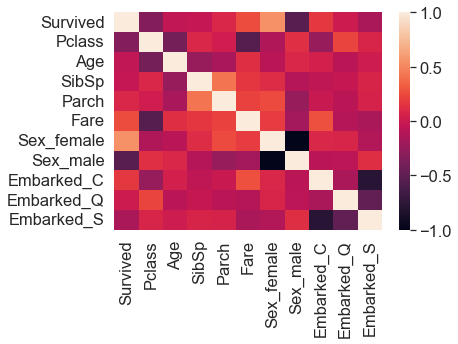

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [18]:
X = df_train_dummied.drop(["Fare","Survived"],axis=1)
y= df_train_dummied.Survived

In [19]:
X.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [22]:
LogR = LogisticRegression() 

In [23]:
LogR.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred = LogR.predict(X_test)

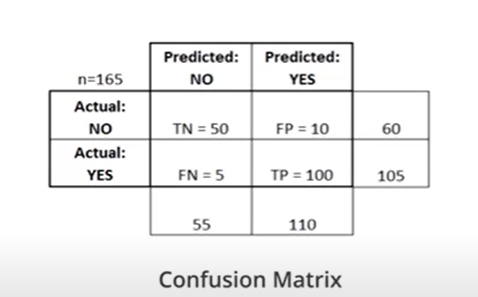

In [25]:
from IPython.core.display import Image, display
display(Image(filename='Confusion_Matrix.png'))

In [26]:
# Compute the confusion matrix to evaluate the accuracy of classification
print(metrics.confusion_matrix(y_test,y_pred))

TN,FP,FN,TP = confusion_matrix(y_test,y_pred).ravel()

print("True Negative :",TN) 
print("False Positive :",FP) 
print("False Negative :",FN) 
print("True Positive :",TP) 
# and N = 267

[[143  23]
 [ 22  79]]
True Negative : 143
False Positive : 23
False Negative : 22
True Positive : 79


- Interpret the results, out of 166 actual instances have not survived, The classifier predicted correctly 143 of them. Out of 101 actual instances of survived, The classifier predicted 79 correctly.

In [27]:
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [29]:
# Computed the Coefficent and the Intercept of the Predicted line 
print("Coefficient :",LogR.coef_)
print("Intercept :",LogR.intercept_)

Coefficient : [[-1.04314192 -0.03993457 -0.24324446 -0.04008103  1.19387943 -1.19533661
   0.34944138 -0.03635018 -0.31454837]]
Intercept : [3.66253934]


In [30]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [31]:
'''First Column is the Probability that the entry has not survived label, and the
Second Column is the Probability that the entry has Survived the label'''
LogR.predict_log_proba(X_test)

array([[-1.32641001, -0.30846786],
       [-0.92429923, -0.50552204],
       [-0.05389597, -2.94752657],
       [-1.35131049, -0.29962072],
       [-0.05721253, -2.88945223],
       [-2.00275683, -0.14498265],
       [-1.09892915, -0.40530672],
       [-0.65395873, -0.73393423],
       [-0.24641657, -1.52141133],
       [-0.89761716, -0.52347126],
       [-0.30084893, -1.34780309],
       [-1.55481083, -0.23727967],
       [-0.28940661, -1.38113852],
       [-1.92667172, -0.15739338],
       [-0.14531262, -2.00064449],
       [-0.99530303, -0.46141886],
       [-0.11231079, -2.24211522],
       [-1.21161949, -0.35341561],
       [-1.735828  , -0.19389329],
       [-0.92027085, -0.50818099],
       [-0.0997615 , -2.35443904],
       [-0.5927702 , -0.80473552],
       [-0.14547583, -1.99960158],
       [-0.06426497, -2.77670097],
       [-0.661907  , -0.72539487],
       [-0.66111023, -0.72624456],
       [-3.24407434, -0.03978571],
       [-0.1400039 , -2.03527034],
       [-0.10725438,

# ___Summary Table___

### Step-1: Import the Required Liabraries
### Step-2: Started with the data exploration, performed missing data check, and learned with feature are important
### Step-3: Converted categorical features into numeric ones
### Step-4: Finally, we built a classifier to predict survival.


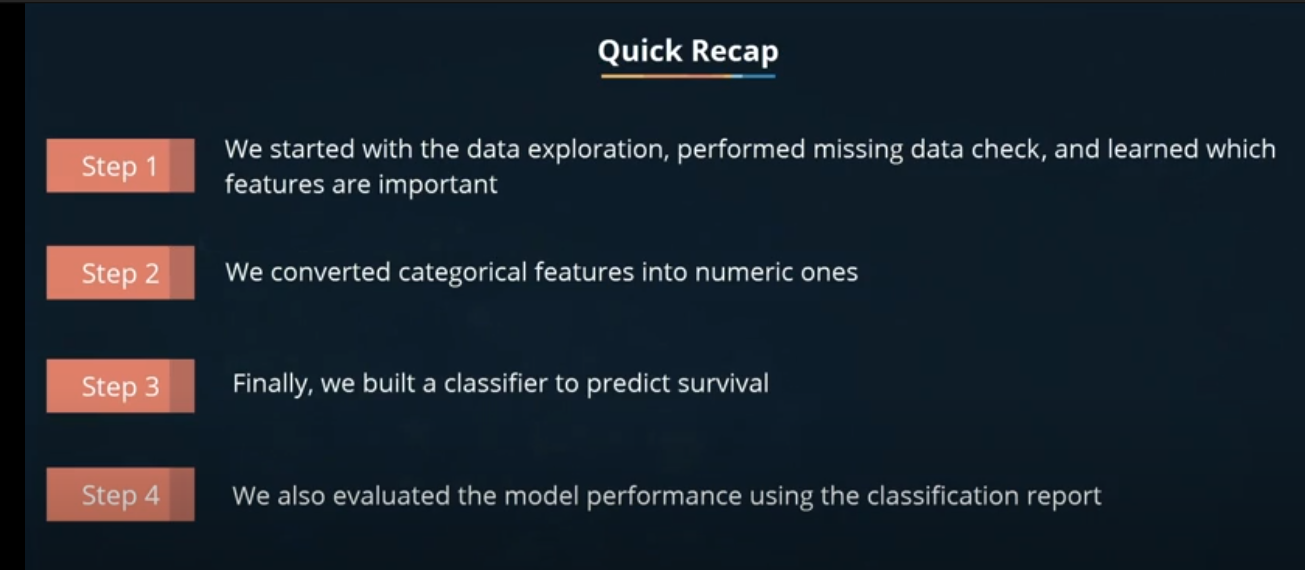

In [32]:
from IPython.core.display import Image, display
display(Image(filename='Titanic_Recap.png'))